<div class="text-warning">
    <div class="text-center">
        <div class="h1">practise 4 - churn prediction</div>
        <div class="h5">maktabkhooneh</div>
    </div>
    <div class="h4">Name: Amir Mohammad Arghavany</div>
    <div class="h4">Email: amir.arghavoon@gmail.com</div>
</div>

# import packages

In [1]:
# base
import numpy as np
import pandas as pd
# check database & model
from pycaret.classification import *
# EDA
from ydata_profiling import ProfileReport
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import re
# split train & test
from sklearn.model_selection import train_test_split
# hyper parameters
from sklearn.model_selection import GridSearchCV, KFold
# learning
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from xgboost import XGBClassifier
# metrics
from sklearn.metrics import recall_score, classification_report
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix
# feature importance
import shap
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# save model
import joblib

# load dataset

In [2]:
df = pd.read_csv(r'D:\DRIVER\LEARNING\OUT OF UNIVERSITY\ML\Quize\ML PRACTICAL\Q4 - churn prediction\IT_customer_churn.csv')

# check database

In [3]:
# quick check on columns
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<div class="text-center h2 text-primary">handel columns <span class="text-danger">error</span></div>

<div><span class="text-danger h1">- </span><span class="h3 text-info">check columns unique value</span></div>

In [4]:
def check_columns_unique(data):
    for c in data.columns:
        print('-'*45, data.dtypes[c], '-'*5, c)
        print(data[c].unique())
check_columns_unique(df)

--------------------------------------------- object ----- gender
['Female' 'Male']
--------------------------------------------- int64 ----- SeniorCitizen
[0 1]
--------------------------------------------- object ----- Partner
['Yes' 'No']
--------------------------------------------- object ----- Dependents
['No' 'Yes']
--------------------------------------------- int64 ----- tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------- object ----- PhoneService
['No' 'Yes']
--------------------------------------------- object ----- MultipleLines
['No phone service' 'No' 'Yes']
--------------------------------------------- object ----- InternetService
['DSL' 'Fiber optic' 'No']
--------------------------------------------- object ----- OnlineSecurity
['No' 'Yes' 'No inte

<div><span class="text-danger h1">- </span><span class="h3 text-info">replace duplicated object values</span></div>

In [5]:
df['MultipleLines'].replace({'No phone service': 'No'}, inplace=True)
for c in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df[c].replace({'No internet service': 'No'}, inplace=True)

<div><span class="text-danger h1">- </span><span class="h3 text-info">convert str(int) to int</span></div>

In [6]:
# check why it doesn't convert
# pd.to_numeric(df.TotalCharges,errors='raise')

In [7]:
# handel error in values
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: re.sub(' ', '', x))

In [8]:
# convert str(int) to int
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='raise')

<div><span class="text-danger h1">- </span><span class="h3 text-info">recheck</span></div>

In [9]:
check_columns_unique(df)

--------------------------------------------- object ----- gender
['Female' 'Male']
--------------------------------------------- int64 ----- SeniorCitizen
[0 1]
--------------------------------------------- object ----- Partner
['Yes' 'No']
--------------------------------------------- object ----- Dependents
['No' 'Yes']
--------------------------------------------- int64 ----- tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------- object ----- PhoneService
['No' 'Yes']
--------------------------------------------- object ----- MultipleLines
['No' 'Yes']
--------------------------------------------- object ----- InternetService
['DSL' 'Fiber optic' 'No']
--------------------------------------------- object ----- OnlineSecurity
['No' 'Yes']
--------------------------

# check models

In [10]:
setup(df, target='Churn', session_id=999, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,999
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 20)"
5,Transformed data shape,"(7043, 27)"
6,Transformed train set shape,"(4930, 27)"
7,Transformed test set shape,"(2113, 27)"
8,Ordinal features,12
9,Numeric features,4


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [11]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8053,0.0000,0.8053,0.7963,0.7979,0.4670,0.4722,0.5170
lr,Logistic Regression,0.8043,0.8470,0.8043,0.7958,0.7981,0.4691,0.4726,0.6450
ada,Ada Boost Classifier,0.8034,0.8484,0.8034,0.7952,0.7970,0.4663,0.4705,1.0940
gbc,Gradient Boosting Classifier,0.8032,0.8515,0.8032,0.7949,0.7964,0.4641,0.4690,2.2260
lda,Linear Discriminant Analysis,0.8002,0.8396,0.8002,0.7937,0.7959,0.4670,0.4689,0.5370
lightgbm,Light Gradient Boosting Machine,0.7974,0.8382,0.7974,0.7897,0.7919,0.4547,0.4576,2.9180
rf,Random Forest Classifier,0.7943,0.8316,0.7943,0.7843,0.7860,0.4351,0.4408,1.4890
xgboost,Extreme Gradient Boosting,0.7844,0.8270,0.7844,0.7777,0.7799,0.4258,0.4277,0.9320
et,Extra Trees Classifier,0.7803,0.8032,0.7803,0.7694,0.7722,0.3995,0.4040,1.6220
knn,K Neighbors Classifier,0.7570,0.7487,0.7570,0.7421,0.7464,0.3288,0.3336,0.8280


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=999, solver='auto',
                tol=0.0001)

In [12]:
# create model for features importance in SHAP
pycaret_rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7809,0.8292,0.7809,0.7779,0.7793,0.4303,0.4305
1,0.7931,0.8543,0.7931,0.7817,0.7838,0.4280,0.4342
2,0.8296,0.8726,0.8296,0.8234,0.8249,0.5410,0.5443
3,0.8276,0.8676,0.8276,0.8198,0.8189,0.5196,0.5288
4,0.7505,0.8054,0.7505,0.7388,0.7432,0.3262,0.3284
5,0.7870,0.7983,0.7870,0.7746,0.7771,0.4096,0.4160
6,0.7870,0.8083,0.7870,0.7758,0.7786,0.4158,0.4206
7,0.7890,0.8527,0.7890,0.7777,0.7804,0.4198,0.4251
8,0.8114,0.8211,0.8114,0.8016,0.8025,0.4739,0.4814


# EDA

In [13]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4210,Female,1,Yes,Yes,61,Yes,Yes,DSL,No,No,Yes,No,Yes,No,One year,Yes,Electronic check,65.20,3965.05,No
2099,Female,0,Yes,No,40,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),78.85,3126.85,No
5302,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,65.50,616.90,No
2791,Male,0,No,No,57,Yes,No,DSL,Yes,No,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),74.35,4317.35,No
3471,Female,0,No,No,35,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,21.10,741.00,No


<div class="h3 text-primary text-center">type, null, unique values, value count, simple statistics</div>

In [14]:
print('='*55, '[check] data & type')
print(df.info())

print('='*55, ['check null data'])
print(df.isna().sum())

print('='*55, 'number of unique values in each column')
print(df.nunique())

print('='*55, '[check] imbalenced data')
for i in df.columns:
    print('-'*45, i)
    print(df[i].value_counts())

print('='*55, '[check] scaling')
print(df.describe())

======================================================= [check] data & type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBill

<div class="h3 text-primary text-center">distribution of features</div>

In [15]:
# categorical features & target
for i in ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    print('-'*45, f'{i} - Churn')
    print(pd.crosstab(df[i], df['Churn']))

--------------------------------------------- gender - Churn
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930
--------------------------------------------- SeniorCitizen - Churn
Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476
--------------------------------------------- Partner - Churn
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669
--------------------------------------------- Dependents - Churn
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326
--------------------------------------------- PhoneService - Churn
Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699
--------------------------------------------- MultipleLines - Churn
Churn            No   Yes
MultipleLines            
No             3053  1019
Yes            2121   850
--------------------------------------------- InternetSer

# visualization

<div class="h3 text-primary text-center">check outliers <span class="text-success h4">[no outliers]</span></div>

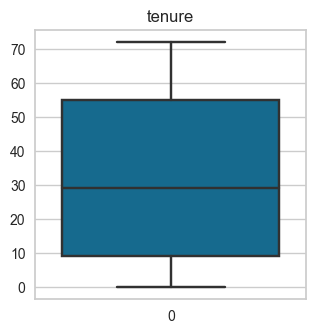

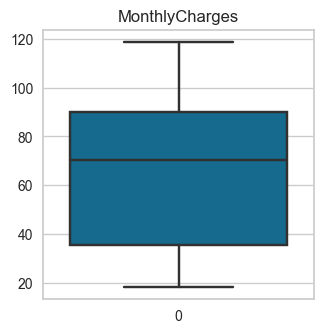

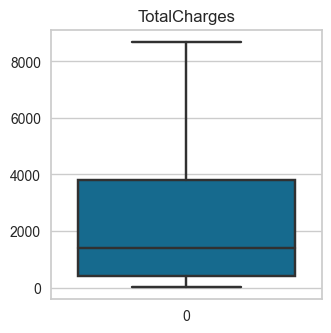

In [16]:
for c in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    sns.boxplot(df[c]).figure.set_size_inches(3.5, 3.5)
    plt.title(c)
    plt.show()

<div class="h3 text-primary text-center">categorical distribution</div>

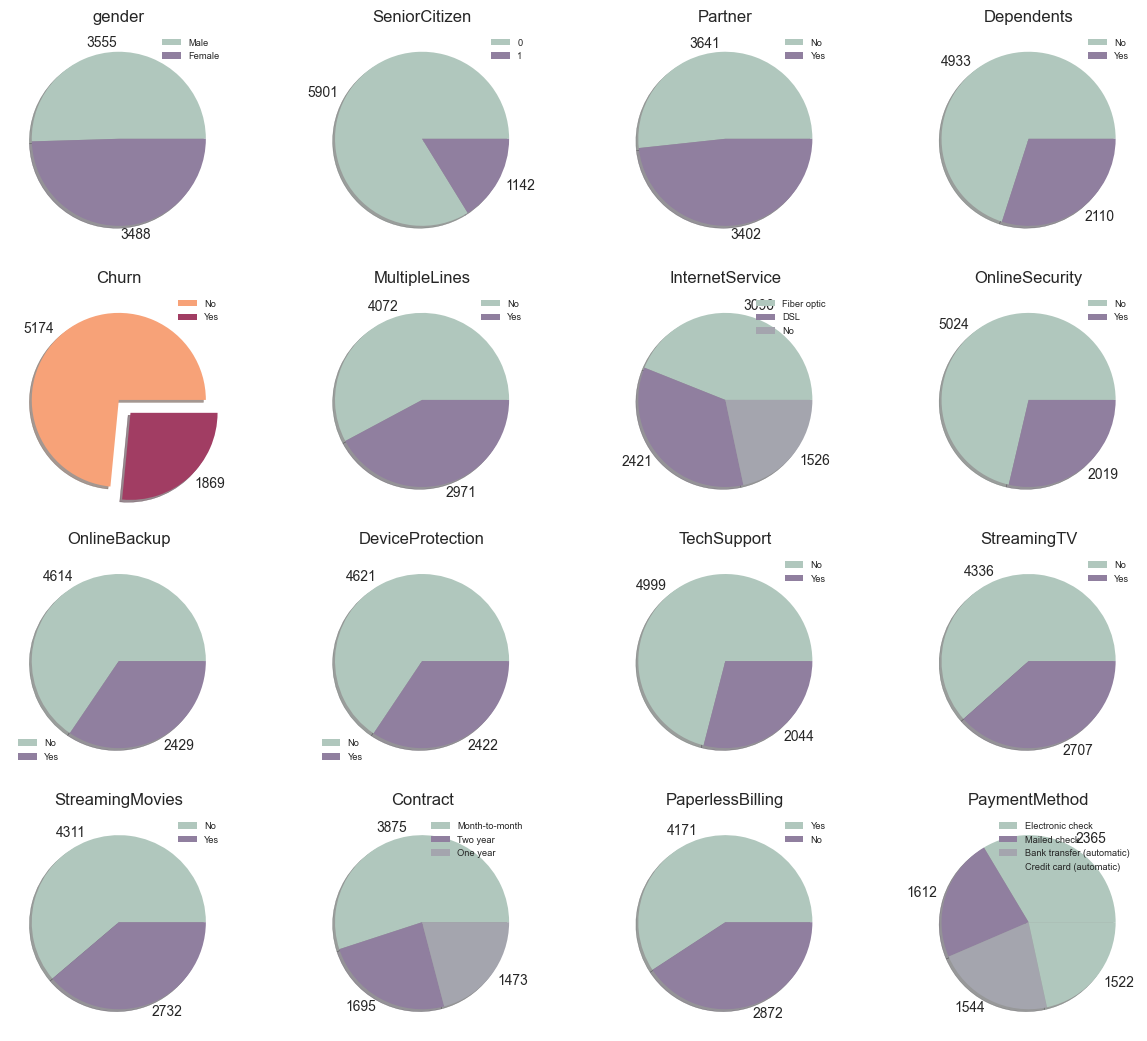

In [17]:
matplotlib.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,13))
colors = ['#B0C7BD', '#907F9F', '#A4A5AE']
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Churn', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
j, k = 0, 0
for i in range(len(columns)):
    if k >= 4:
        k -= 4
        j += 1
    data = df[columns[i]].value_counts()
    if columns[i] is 'Churn':
        ax[j, k].pie(data, labels=data.values, shadow=True, colors=['#F7A278', '#A13D63'], explode=[0, 0.2])
    else:
        ax[j, k].pie(data, labels=data.values, shadow=True, colors=colors)
    ax[j, k].legend(labels=data.index, fontsize='small')
    ax[j, k].set_title(columns[i])
    k += 1

<div class="h3 text-primary text-center">numerical distribution</div>

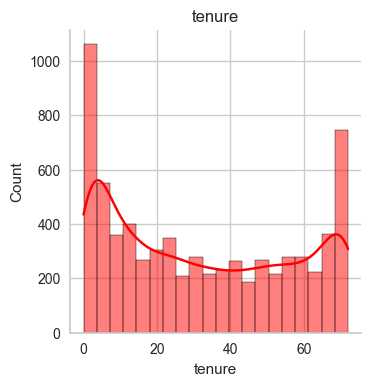

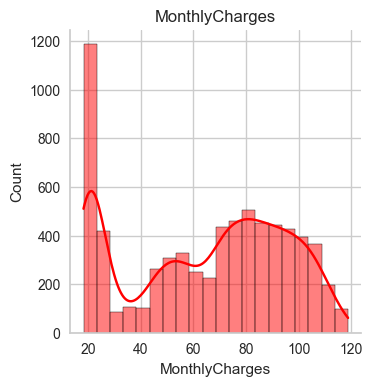

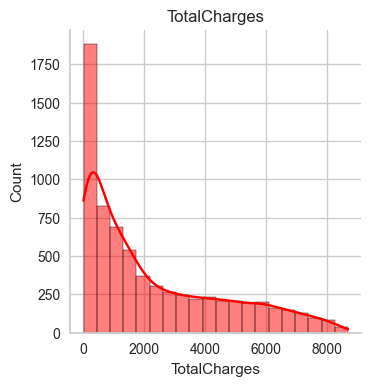

In [18]:
for c in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    sns.displot(df[c] , bins=20 , kde=True, color='red').figure.set_size_inches(3.5, 3.5)
    plt.title(c)
    plt.show()

<div class="h3 text-primary text-center">relation plot</div>

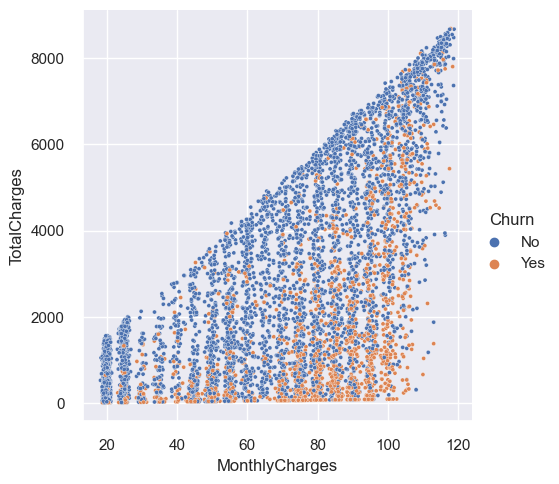

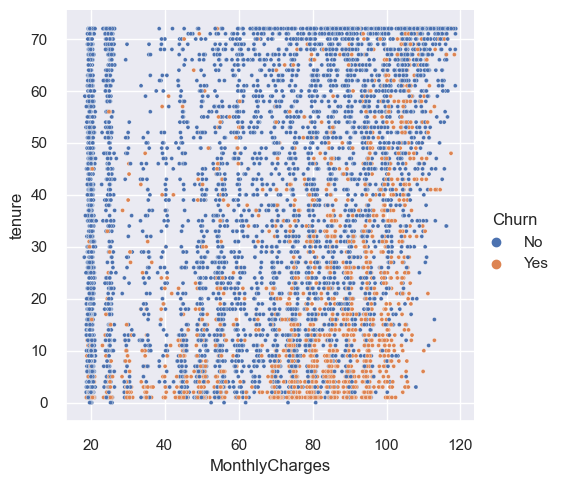

In [19]:
sns.set_theme(style='darkgrid')
sns.relplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn', s=9)
sns.relplot(x='MonthlyCharges', y='tenure', data=df, hue='Churn', s=9)
plt.show()

<div class="h3 text-primary text-center">categorical plot</div>

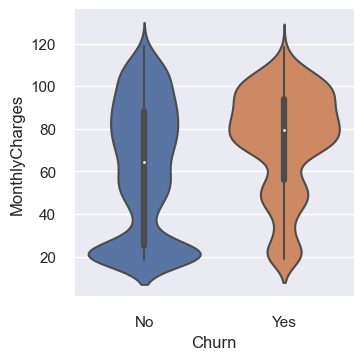

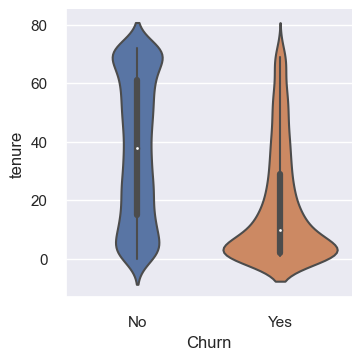

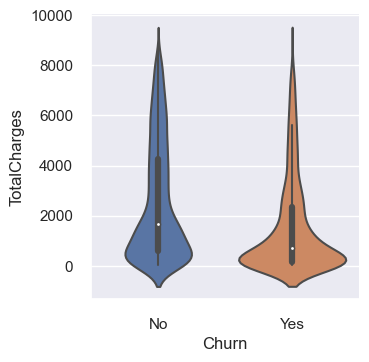

In [20]:
sns.catplot(x='Churn', y='MonthlyCharges', data=df, kind='violin').figure.set_size_inches(3.5, 3.5)
sns.catplot(x='Churn', y='tenure', data=df, kind='violin').figure.set_size_inches(3.5, 3.5)
sns.catplot(x='Churn', y='TotalCharges', data=df, kind='violin').figure.set_size_inches(3.5, 3.5)

# preprocessing

<div class="h3 text-primary text-center">encoding</div>

In [21]:
# 2 unique value
df.dropna(inplace=True)
for c in ['Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn']:
    df[c].replace({'Yes': 1, 'No': 0}, inplace=True)
df['gender'].replace({'Female':0, 'Male': 1}, inplace=True)    

In [22]:
# multiple unique value
df = df.merge(pd.get_dummies(df[['InternetService', 'Contract', 'PaymentMethod']]), left_index = True, right_index = True)
df.drop(columns = ['InternetService', 'Contract', 'PaymentMethod'], inplace = True)

In [23]:
# recheck
check_columns_unique(df)

--------------------------------------------- int64 ----- gender
[0 1]
--------------------------------------------- int64 ----- SeniorCitizen
[0 1]
--------------------------------------------- int64 ----- Partner
[1 0]
--------------------------------------------- int64 ----- Dependents
[0 1]
--------------------------------------------- int64 ----- tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
--------------------------------------------- int64 ----- PhoneService
[0 1]
--------------------------------------------- int64 ----- MultipleLines
[0 1]
--------------------------------------------- int64 ----- OnlineSecurity
[0 1]
--------------------------------------------- int64 ----- OnlineBackup
[1 0]
--------------------------------------------- int64 ----- DeviceProtection
[0 1]
---------------------------

In [24]:
# recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

<div class="h3 text-primary text-center">handel imbalenced target</div>

In [25]:
print('-'*25, 'before:\n', df['Churn'].value_counts())
smote = SMOTE(random_state=999)
X, Y = smote.fit_resample(df.drop('Churn', axis=1), df['Churn'])
print('-'*25, 'after:\n', Y.value_counts())

------------------------- before:
 0    5163
1    1869
Name: Churn, dtype: int64
------------------------- after:
 0    5163
1    5163
Name: Churn, dtype: int64


# feature importance

<div class="h3 text-primary text-center">correlation</div>

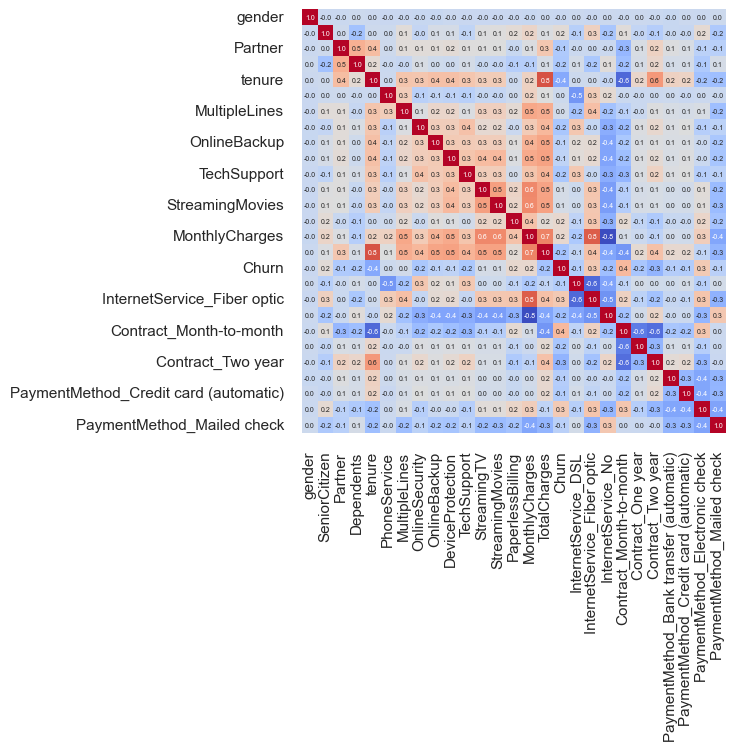

In [26]:
corr = df.corr()
sns.heatmap(corr, square=True, fmt='.1f', annot=True, annot_kws={'size': 5}, cmap='coolwarm', cbar=False)
plt.show()

<div class="h3 text-primary text-center">shap</div>

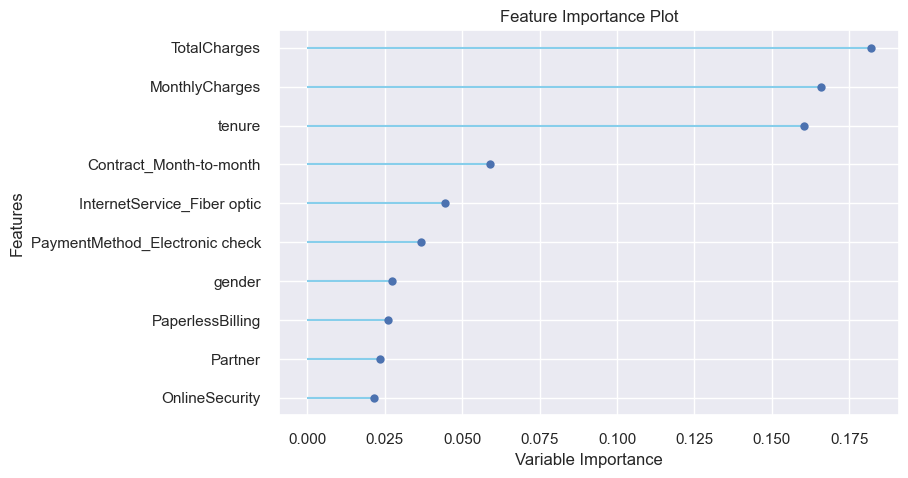

In [27]:
# create model for shap
plot_model(estimator=pycaret_rf, plot='feature')

# train & test

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=999, test_size=0.2, stratify=Y)

# scaling

In [29]:
mmc = MinMaxScaler()
X_train = pd.DataFrame(mmc.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(mmc.fit_transform(X_test), columns=X.columns)

# hyper parameters

In [30]:
# search function for best parameters + report
def parameter_finder (model, parameters={}):
    grid = GridSearchCV(model, 
                        param_grid = parameters, 
                        refit = True, 
                        cv = KFold(shuffle = True, random_state = 1), 
                        n_jobs = -1)
    grid_fit = grid.fit(X_train, Y_train)
    Y_train_pred = grid_fit.predict(X_train)
    Y_pred = grid_fit.predict(X_test)
    print('='*55, str(model).split('(')[0])
    print(f'best param: {grid_fit.best_params_}')
    print('-'*55, 'train report')
    print(classification_report(Y_train, Y_train_pred))
    print('-'*55, 'test report')
    print(classification_report(Y_test, Y_pred))
    print('*'*55, 'recall score')
    print('train:', np.round(recall_score(Y_train, Y_train_pred)*100, 2), '%')
    print('test:', np.round(recall_score(Y_test, Y_pred)*100, 2), '%')

In [31]:
ridge = RidgeClassifier()
params = {
    'alpha': [0.1, 1, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
}
parameter_finder(ridge, params)

======================================================= RidgeClassifier
best param: {'alpha': 0.1, 'solver': 'auto'}
------------------------------------------------------- train report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4130
           1       0.84      0.85      0.84      4130

    accuracy                           0.84      8260
   macro avg       0.84      0.84      0.84      8260
weighted avg       0.84      0.84      0.84      8260

------------------------------------------------------- test report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.83      0.85      0.84      1033

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

******************************************************* recall score
train: 84.7 %
test: 85.

In [32]:
lr = LogisticRegression()
params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs','liblinear', 'newton-cg']
}
parameter_finder(lr, params) # best model

======================================================= LogisticRegression
best param: {'penalty': 'l1', 'solver': 'liblinear'}
------------------------------------------------------- train report
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4130
           1       0.85      0.84      0.85      4130

    accuracy                           0.85      8260
   macro avg       0.85      0.85      0.85      8260
weighted avg       0.85      0.85      0.85      8260

------------------------------------------------------- test report
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1033
           1       0.85      0.84      0.85      1033

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

******************************************************* recall score
train: 84.04

In [33]:
xgbc = XGBClassifier()
params = {
    'max_depth': [5],
    'learning_rate': [0.004],
    'subsample': [0.5],
    'n_estimators': [250],
}
parameter_finder(xgbc, params) # overfitted

======================================================= XGBClassifier
best param: {'learning_rate': 0.004, 'max_depth': 5, 'n_estimators': 250, 'subsample': 0.5}
------------------------------------------------------- train report
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      4130
           1       0.81      0.88      0.85      4130

    accuracy                           0.84      8260
   macro avg       0.84      0.84      0.84      8260
weighted avg       0.84      0.84      0.84      8260

------------------------------------------------------- test report
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1033
           1       0.80      0.88      0.84      1033

    accuracy                           0.83      2066
   macro avg       0.84      0.83      0.83      2066
weighted avg       0.84      0.83      0.83      2066

***********************************************

# ML & best model

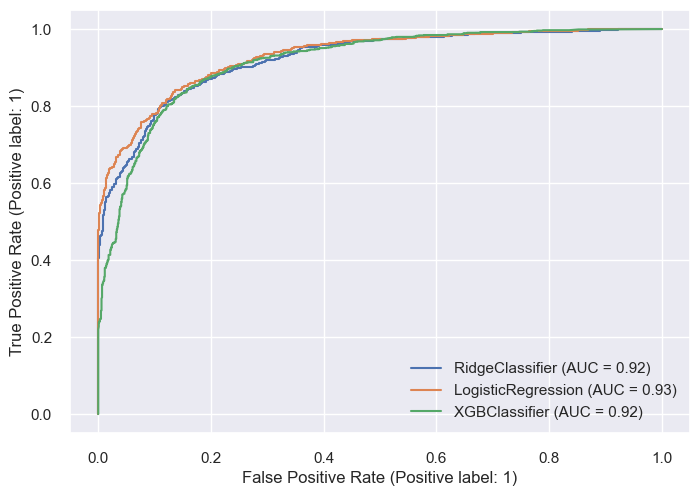

In [34]:
# ridge
ridge = RidgeClassifier(alpha=0.1)
ridge.fit(X_train, Y_train)
# logistic regression
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, Y_train)
# XGBoost classifier
xgbc = XGBClassifier(max_depth=5, learning_rate=0.004, subsample=0.5, n_estimators=250)
xgbc.fit(X_train, Y_train)

# roc curve
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(ridge, X_test, Y_test, ax=ax)
RocCurveDisplay.from_estimator(lr, X_test, Y_test, ax=ax)
RocCurveDisplay.from_estimator(xgbc, X_test, Y_test, ax=ax)
plt.show()

# metrics

In [40]:
# predict
Y_pred = xgbc.predict(X_test)
Y_train_pred = xgbc.predict(X_train)

In [41]:
# recall
print('train:', np.round(recall_score(Y_train, Y_train_pred)*100, 2), '%')
print('test:', np.round(recall_score(Y_test, Y_pred)*100, 2), '%')

train: 88.28 %
test: 88.38 %


In [42]:
# classification report
print('-'*55, 'train report')
print(classification_report(Y_train, Y_train_pred))
print('-'*55, 'test report')
print(classification_report(Y_test, Y_pred))

------------------------------------------------------- train report
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      4130
           1       0.81      0.88      0.85      4130

    accuracy                           0.84      8260
   macro avg       0.84      0.84      0.84      8260
weighted avg       0.84      0.84      0.84      8260

------------------------------------------------------- test report
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1033
           1       0.80      0.88      0.84      1033

    accuracy                           0.83      2066
   macro avg       0.84      0.83      0.83      2066
weighted avg       0.84      0.83      0.83      2066



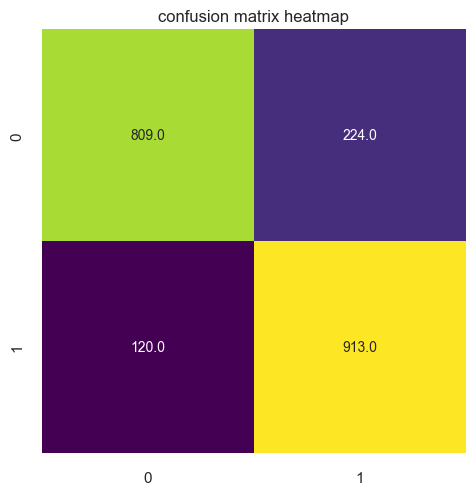

In [43]:
# confusion matrix
sns.heatmap(confusion_matrix(Y_test, Y_pred), square=True, fmt='.1f', annot=True, annot_kws={'size': 10}, cmap='viridis', cbar=False)
plt.title('confusion matrix heatmap')
plt.show()

# save model

In [45]:
joblib.dump(xgbc, 'churn_xgbc.joblib')

['churn_xgbc.joblib']